#AIML Computer Vision Project - Onkar G, Date - 27_Oct_2024


## Part A
**DOMAIN:** Entertainment     
**CONTEXT:**   Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.    
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene.        
Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene           
**DATA DESCRIPTION:** The dataset comprises of images and its mask for corresponding human face       
**PROJECT OBJECTIVE:** To build a face detection system.

### 1. Import and Understand the data
   A. Import and read ‘images.npy’.

Mounting Google Drive on to the Google Colab instance

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [6]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

Set the appropriate path for the datsaet provided

In [7]:
path = "/content/drive/MyDrive/comouter Visison Project files/Images.npy"


We have been provided witht a .npy extension file.      
The . npy format is the standard binary file format in NumPy for persisting a single arbitrary NumPy array on disk. The format stores all of the shape and dtype information necessary to reconstruct the array correctly even on another machine with a different architecture

Assigning a Object Train_data to be used further which has the input content from the .npy file

In [8]:
Train_data = np.load(path, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

allow_pickle : When set to True , it will allow reading pickle arrays from . npy and . npz files. The default value of this parameter is False  

If fix_imports is True, pickle will try to map the old Python 2 names to the new names used in Python 3.    
        
encoding='ASCII' is a parameter that specifies ASCII encoding in Pandas. ASCII stands for American Standard Code for Information Interchange, and it's a character encoding format for text data. ASCII is commonly used in computers and on the internet.  


Data Overview

Shape of the data

In [9]:
Train_data.shape

(393, 2)

The training data consists of 2 columns. First column consists of 393 images.

Checking the Size of images in the first column

In [10]:
Train_data[0][0].shape

(333, 650, 3)

Image is of size 333 by 650 and of 3 channels which are RGB.

Checking a random image

In [11]:
Train_data[201][0]


array([[[ 92, 111,  22],
        [ 89, 108,  19],
        [ 89, 108,  19],
        ...,
        [156, 183, 174],
        [153, 179, 166],
        [150, 177, 162]],

       [[ 72,  92,   7],
        [ 74,  93,  11],
        [ 75,  94,  12],
        ...,
        [163, 190, 183],
        [158, 185, 176],
        [155, 183, 171]],

       [[ 60,  78,   2],
        [ 60,  81,   6],
        [ 59,  80,   5],
        ...,
        [172, 198, 197],
        [168, 194, 191],
        [165, 192, 187]],

       ...,

       [[164, 104,  76],
        [159,  99,  71],
        [159,  99,  71],
        ...,
        [ 61,  46,  43],
        [ 62,  47,  44],
        [ 59,  44,  41]],

       [[163, 103,  75],
        [158,  98,  70],
        [157,  97,  69],
        ...,
        [ 61,  46,  43],
        [ 61,  46,  43],
        [ 58,  43,  40]],

       [[162, 102,  74],
        [159,  99,  71],
        [157,  97,  69],
        ...,
        [ 60,  45,  42],
        [ 60,  45,  42],
        [ 58,  43,  40]]

In the first column We can see that the images are stored in the form of array, each element represents the pixel value of the image.

Showing the image

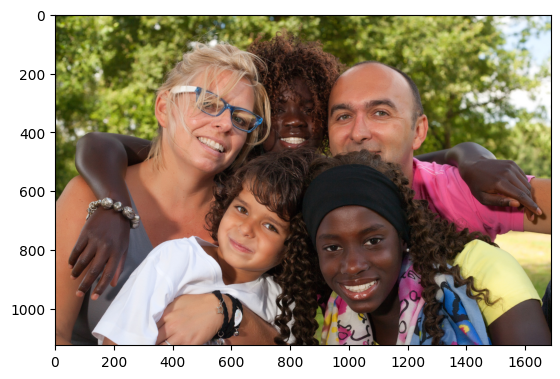

In [12]:
plt.imshow(Train_data[201][0])

Checking the second column

In [13]:
Train_data[201][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.26543878656554715, 'y': 0.20650406504065041},
   {'x': 0.4106175514626219, 'y': 0.45691056910569106}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.42145178764897073, 'y': 0.23902439024390243},
   {'x': 0.5362946912242686, 'y': 0.42276422764227645}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.352112676056338, 'y': 0.5333333333333333},
   {'x': 0.4561213434452871, 'y': 0.7463414634146341}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5189599133261105, 'y': 0.6211382113821138},
   {'x': 0.6803900325027086, 'y': 0.8699186991869918}],
  'imageWidth': 1688,
  'imageHeight': 1125}]

The second column shows the Label information.    
 It contains                 
*   the size of the image (height and width),
*   label,
*   notes which could be the description of the image,
*   points which contains the x and y coordinates of faces in the image.





Let's segregate the data as images and masks and also display a sample image and it's corresponding mask.

In [14]:
images = Train_data[:,0]
mask = Train_data[:,1]
print(images.shape, mask.shape)

(393,) (393,)


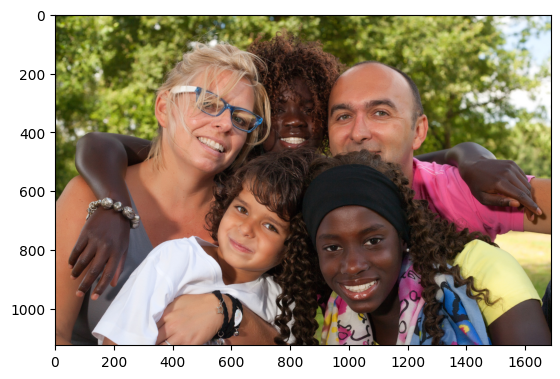

In [15]:
#plotting image
plt.imshow(images[201])

In [16]:
#Displaying mask information
display(mask[201])

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.26543878656554715, 'y': 0.20650406504065041},
   {'x': 0.4106175514626219, 'y': 0.45691056910569106}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.42145178764897073, 'y': 0.23902439024390243},
   {'x': 0.5362946912242686, 'y': 0.42276422764227645}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.352112676056338, 'y': 0.5333333333333333},
   {'x': 0.4561213434452871, 'y': 0.7463414634146341}],
  'imageWidth': 1688,
  'imageHeight': 1125},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5189599133261105, 'y': 0.6211382113821138},
   {'x': 0.6803900325027086, 'y': 0.8699186991869918}],
  'imageWidth': 1688,
  'imageHeight': 1125}]

Checking size of some sample images to determine if the images are of same size.

In [17]:
#importing image from , The PIL format, short for Python Imaging Library, is a powerful library in Python that allows users to open, manipulate, and save various image file formats.
#It provides a wide range of features for image processing tasks such as resizing, cropping, applying filters, and more.

from PIL import Image as im

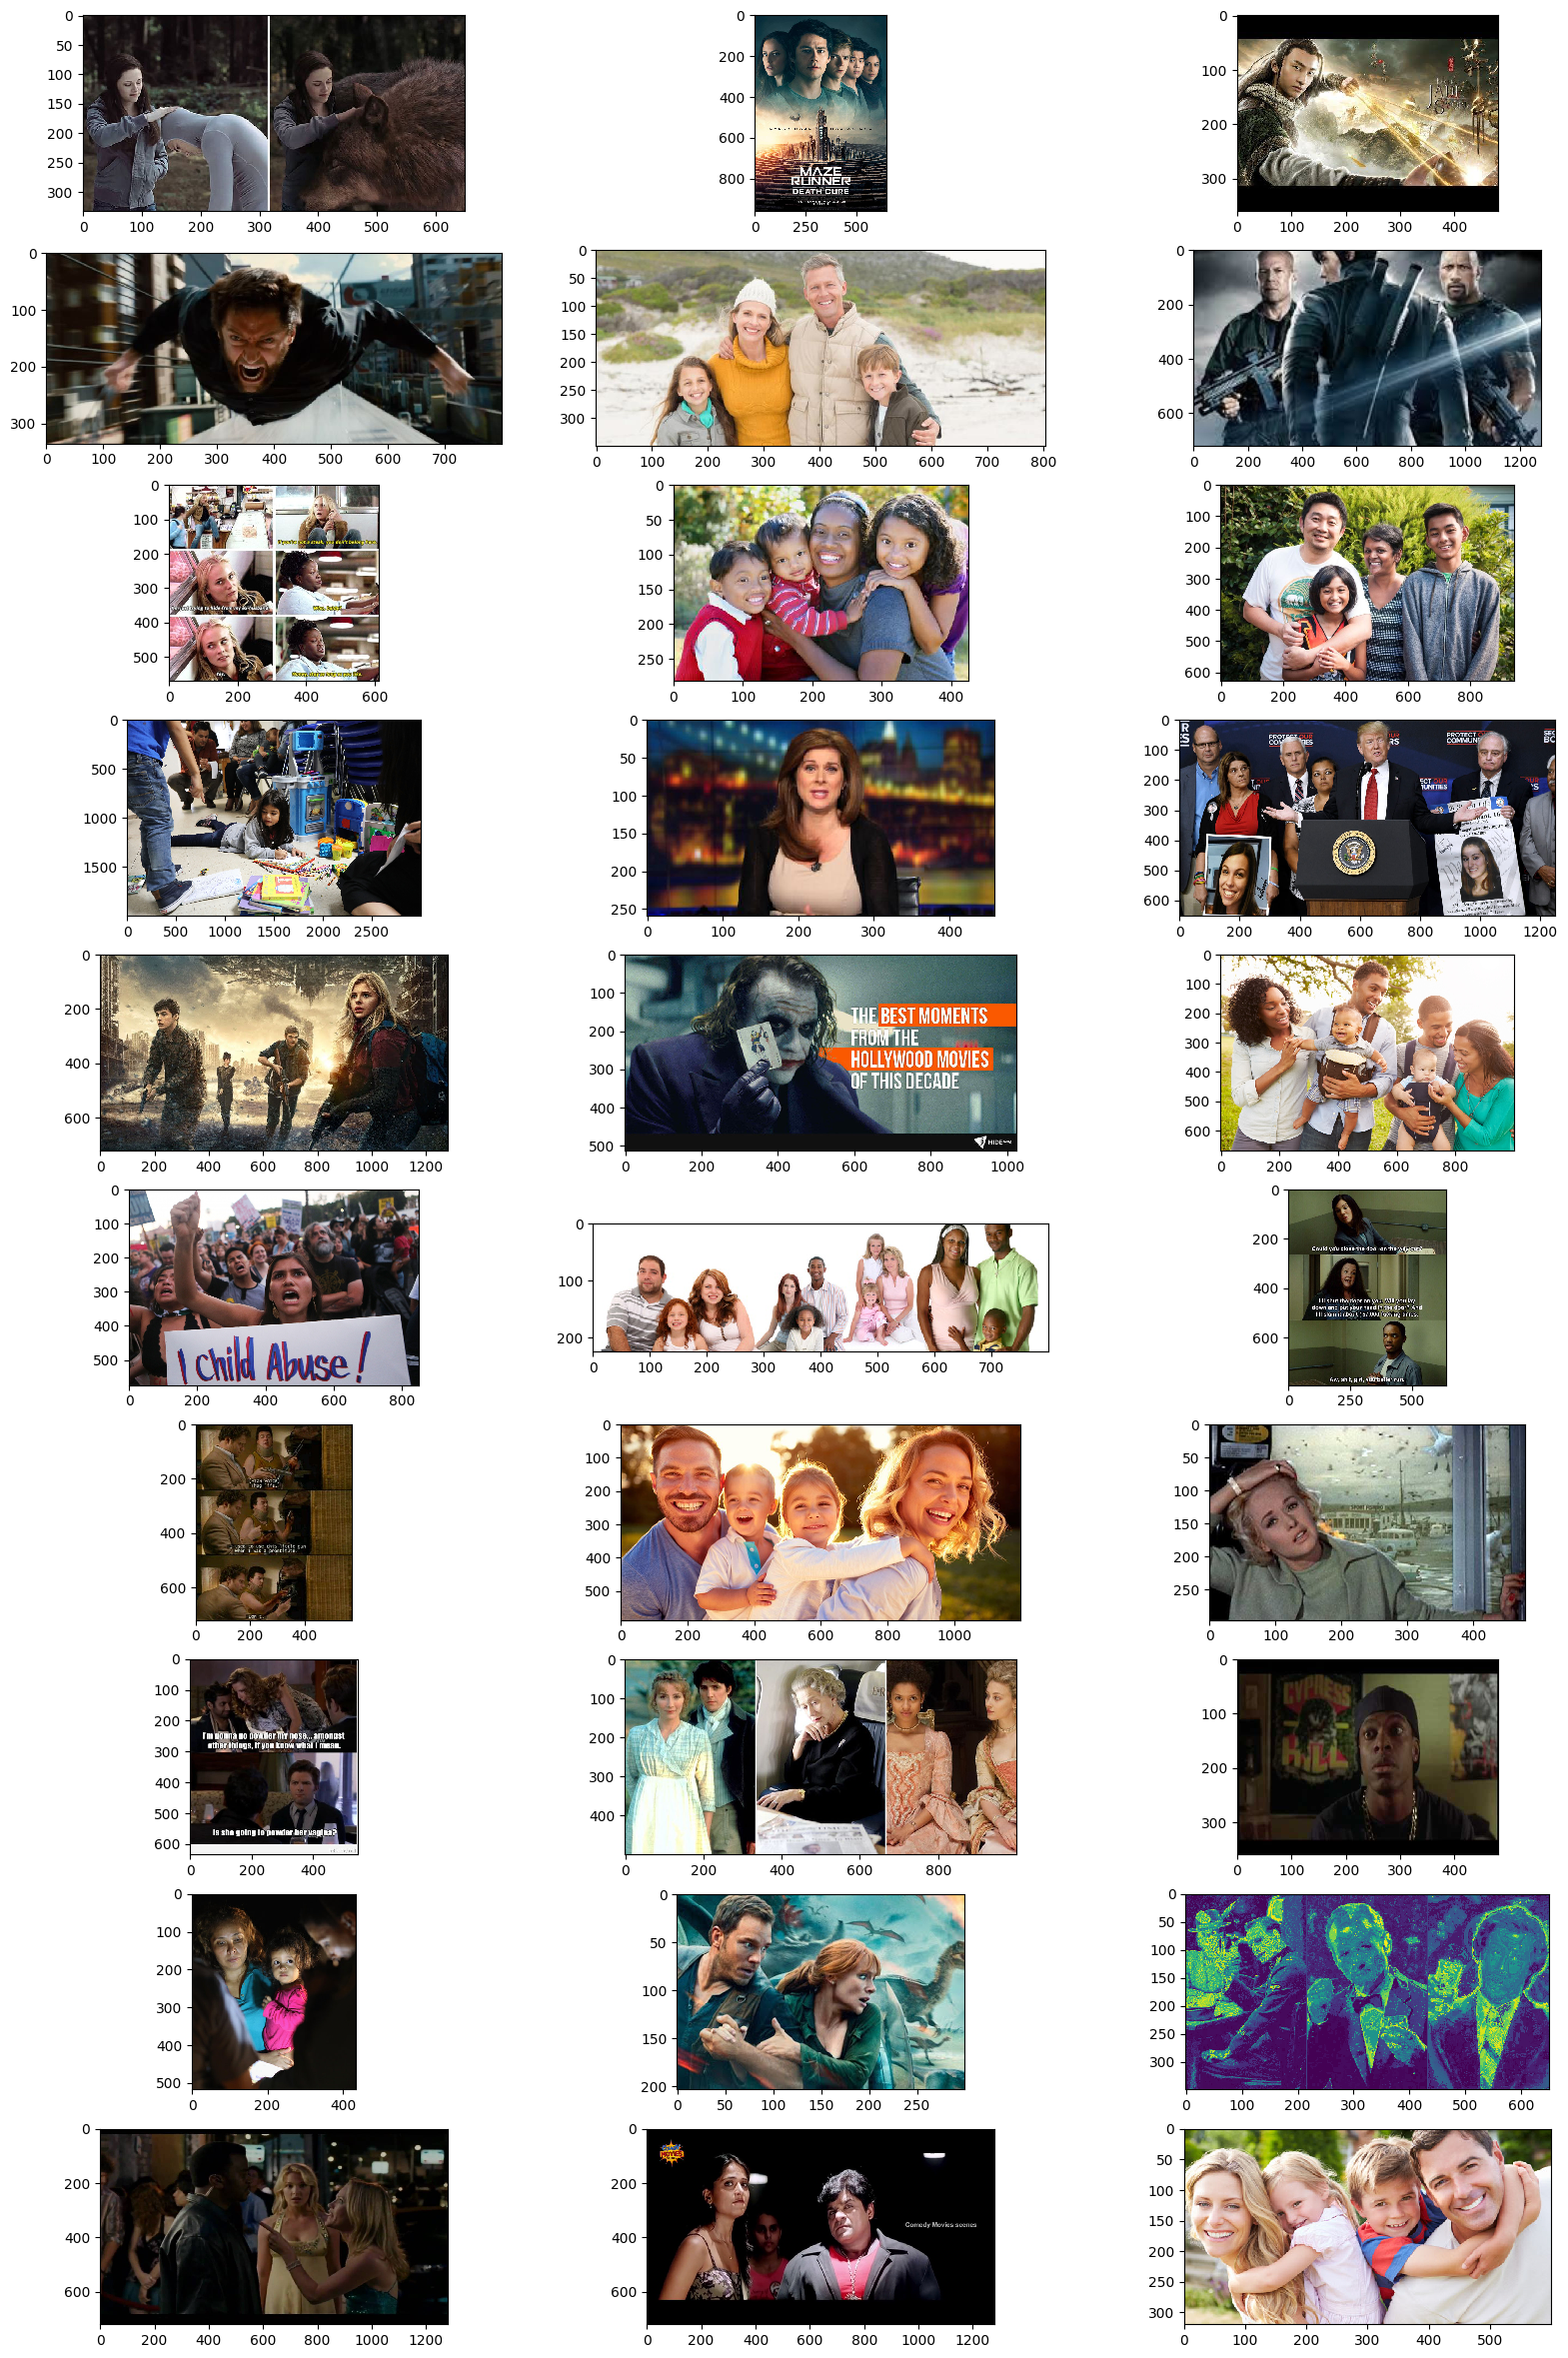

In [18]:
# writing a loop to display random images

fi,ax = plt.subplots(10,3,figsize=(20,30))
row = 0
col = 0
index = 0
for i in range(30):
  ax[row][col].imshow(Train_data[index][0], interpolation='nearest')
  index = index + 10
  col = col + 1
  if col > 2:
    row = row + 1
    col = 0
plt.show()

It can be observed that images are of different sizes and almost all images are color images.

Let's resize and preprocess the images

In [19]:
#defining height and width variable
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

###Part 1.1 b - Split the data into Features(X) & labels(Y). Unify shape of all the images.

Creating features (images) and labels (mask) using that data.

In [20]:
# Create an empty array for storing mask and image details.

mask_label = np.zeros((int(Train_data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
x_train = np.zeros((int(Train_data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
print("x_train_shape:", x_train.shape)

x_train_shape: (393, 224, 224, 3)




1.   IMAGE PREPROCESSING       
It is important to preprocess the images before we use them to train the model.    
   -We will resize all the images to equal width and height as 224. We'll
    create the features and target to train the model.
   -The features are the images and the target is the coordinates of faces.     
   -In the next step, we will save all the preprocessed images in 'X' array of height and width as 224.
   -We will first initialize the X array with zeroes. The (x,y) coordinates will be saved in 'masks' array.

We'll perform the following tasks:
*   resize the images to equal width and height
*   convert grayscale images (if any) to colored
*   use preprocess_input module from tensorflow.keras.applications.mobilenet library


In [21]:
#  The 'import cv2' statement brings the OpenCV library into the Python script,
# allowing access to its functions for computer vision and image processing.
import cv2
from google.colab.patches import cv2_imshow

In [22]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.0-rc0'

In [23]:
from tensorflow.keras.applications import MobileNetV2

for index in range(Train_data.shape[0]):
    img = Train_data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    x_train[index] = tensorflow.keras.applications.mobilenet_v2.preprocess_input(np.array(img, dtype=np.float32))
    for i in Train_data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        mask_label[index][y1:y2, x1:x2] = 1

In [24]:
print("The shape of the training images is {} and the shape of the mask is {}".format(x_train.shape,mask_label.shape))


The shape of the training images is (393, 224, 224, 3) and the shape of the mask is (393, 224, 224)


3. Mask detection model:

### Part 1.1 c - Split the data into train and test [400:9].

Train Test Split
Before we train the model, we will split the dataset into train, test and validation sets.

The train set will be used to train the face detection model, the validation set will be used for evaluation during model training, and the test set is used to evaluate the detected faces on the trained model.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, mask_label, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2)

print(f"Shape of X_train is '{X_train.shape}' and the shape of y_train is '{y_train.shape}'")
print(f"Shape of X_val is '{X_val.shape}' and the shape of y_val is '{y_val.shape}'")
print(f"Shape of X_test is '{X_test.shape}' and the shape of y_test is '{y_test.shape}'")

Shape of X_train is '(314, 224, 224, 3)' and the shape of y_train is '(314, 224, 224)'
Shape of X_val is '(63, 224, 224, 3)' and the shape of y_val is '(63, 224, 224)'
Shape of X_test is '(16, 224, 224, 3)' and the shape of y_test is '(16, 224, 224)'


###Part 1.1 d - Select random image from the train data and display original image and masked image.


Let's visualize some images and their corresponding masks

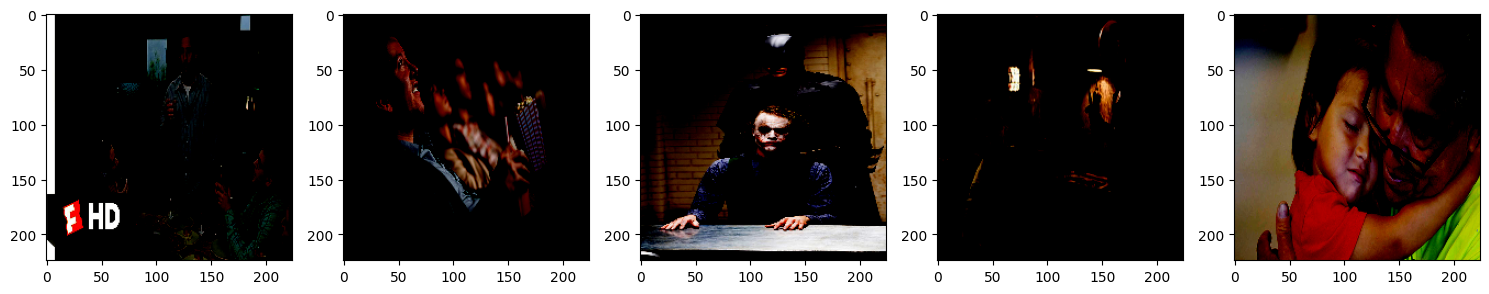

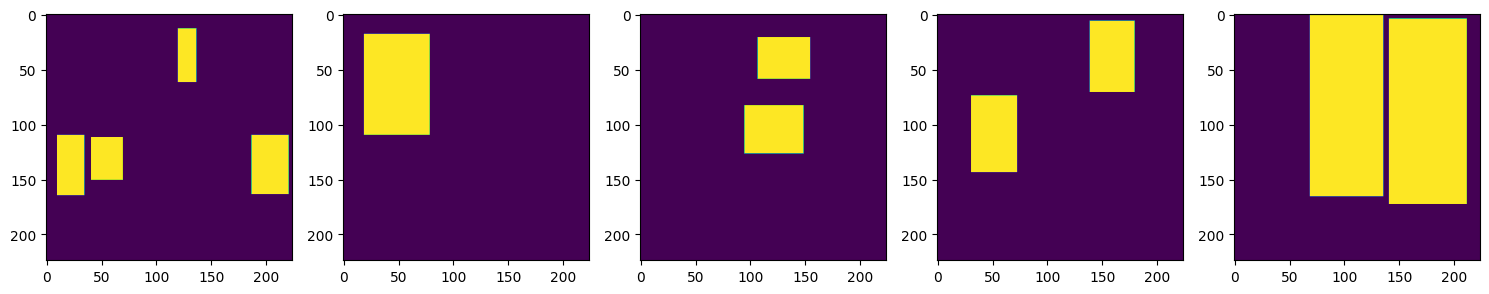

In [26]:

fig = plt.figure(figsize=(15, 15))
a=1
b=5
c = 1
d = 1
for i in range(5):
  plt.subplot(a, b, c)
  plt.imshow(X_train[i])  # Show training images
  c = c + 1
plt.tight_layout() # let's make good plots
plt.show()
fig = plt.figure(figsize=(15, 15))
for i in range(5):
   plt.subplot(a, b, d)
   plt.imshow(y_train[i]) # Show corresponding Mask
   d = d + 1
plt.tight_layout()# let's make good plots
plt.show()

Above we can see someof the images from train data and their corrosponding masks

###Part 1.2 a - Design a face mask detection model.

Creating a Face Detection Model         
Here, we will use transfer learning on the pre-trained MobileNetV2 model. Transfer learning is simply the process of using a pre-trained model that has been trained on a dataset for training and predicting on a new given dataset. MobileNet V2 model was developed at Google, pre-trained on the ImageNet dataset with 1.4M images and 1000 classes of web images. We will use this as our base model to train with our dataset to detect faces.

Initializing the base model

The base model is a pre-trained model. We will create a base model using MobileNet V2. We will also initialize the base model with a matching input size as to the pre-processed image data we have which is 160×160. The base model will have the same weights from imagenet. We will exclude the top layers of the pre-trained model by specifying include_top=False which is ideal for feature extraction.

In [27]:
ALPHA = 0.35 # Alpha channels are used to define the transparency of an image or video, alongside the red, green, and blue color channels.
              #They are used to determine how pixels are rendered when blended with other pixels

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

IMAGE_SIZE = 224

In [28]:
from numpy.core.fromnumeric import shape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Concatenate, UpSampling2D, Reshape, Input
from tensorflow.keras.layers import Conv2D,Activation, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
import tensorflow as tf

● Design a face mask detection model.

Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.                
Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture

In [29]:
inputs=Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),name="input_image")
encoder = MobileNetV2(input_tensor=inputs, include_top=False, alpha=ALPHA, weights="imagenet")
encoder.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

●  MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices.      
● It is based on an inverted residual structure where the residual connections are between the bottleneck layers.          
● The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity.                 
● As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.              
● From this base model we will select the layers for skip connections and create upsampled layers.      

In [30]:
#definng a function to create the desired model
def create_model():

  inputs=Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),name="input_image")
  #Pre-trained Encoder
  encoder = MobileNetV2(input_tensor=inputs, include_top=False, alpha=ALPHA, weights="imagenet")
  skip_connection_names = ["input_image", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
  encoder_output =encoder.get_layer("block_13_expand_relu").output

  f=[16, 32, 48, 64]
  x= encoder_output
  for i in range(1,len(skip_connection_names)+1,1):
    x_skip = encoder.get_layer(skip_connection_names[-i]).output
    print(x_skip)
    x = UpSampling2D([2,2])(x)
    x = Concatenate()([x, x_skip])

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

  x = Conv2D(1, (1, 1), padding="same")(x)
  x = Activation("sigmoid")(x)

  model = Model(inputs,x)
  return model

  # encoder.summary()

In [31]:
model = create_model()
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 96), dtype=tf.float32, name=None), name='block_6_expand_relu/Relu6:0', description="created by layer 'block_6_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 48), dtype=tf.float32, name=None), name='block_3_expand_relu/Relu6:0', description="created by layer 'block_3_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 48), dtype=tf.float32, name=None), name='block_1_expand_relu/Relu6:0', description="created by layer 'block_1_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_image'), name='input_image', description="created by layer 'input_image'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 224, 224, 3  0           []                

### Part 1.2 b - Design your own Dice Coefficient and Loss function.

Let's define function to compute Dice Coefficient and Cross entropy loss function

In [32]:
#Defining batch size , Epochs and learning rate
BATCH = 8
EPOCHS = 30
LR= 1e-4

In [33]:
# defining a function for Dice coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [34]:
from tensorflow.keras.losses import binary_crossentropy
#defining a function for loss function
def dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())


### Part 1.2 c - Train and tune the model as required.

 Train, tune and test the model

In [35]:
opt = tensorflow.keras.optimizers.Adam(LR)
metrics=[dice_coefficient, Recall(), Precision()]
model.compile(loss=dice_loss, optimizer=opt, metrics=metrics)

Define a Callback function      
The goal of  training is to minimize the loss.         
 With this, the metric to be monitored would be 'loss', and mode would be'min'.            
 A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta.        
 Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

In [1]:
# installing higher version of tensorflow - 2.9 as the earlier version was giving issues
!pip install tensorflow==2.9.0rc0

In [36]:
#Improting Dense layer , Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. This means that every neuron in the dense layer takes the input from all the other neurons of the previous layer.

from tensorflow.python.keras.layers import Dense


In [37]:
# ReduceLROnPlateau - educe learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates.
#This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
# Early Stopping is a form of regularization used to avoid overfitting when training a learning algorithm
#ModelCheckpoint callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [ReduceLROnPlateau(monitor='val_loss',factor = 0.1, patience=4),
            EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=False)
            ]

In [39]:
Train_steps=len(X_train) // BATCH
Val_steps=len(X_val) // BATCH

if len(X_train) % BATCH !=0:
  Train_steps +=1

if len(X_val) % BATCH !=0:
  Val_steps +=1

model.fit(
    X_train,y_train,
    validation_data= (X_val,y_val),
    epochs =EPOCHS,
    verbose=1,
    batch_size=BATCH,
    steps_per_epoch=Train_steps,
    validation_steps=Val_steps,
    callbacks=callbacks
)

Epoch 1/30
40/40 [==============================] - 201s 5s/step - loss: 1.0067 - dice_coefficient: 0.4876 - recall: 0.9143 - precision: 0.7642 - val_loss: 1.2581 - val_dice_coefficient: 0.4304 - val_recall: 0.7086 - val_precision: 0.6794 - lr: 1.0000e-04
Epoch 2/30
40/40 [==============================] - 175s 4s/step - loss: 0.9796 - dice_coefficient: 0.5029 - recall: 0.9186 - precision: 0.7789 - val_loss: 1.2599 - val_dice_coefficient: 0.4347 - val_recall: 0.7096 - val_precision: 0.6576 - lr: 1.0000e-04
Epoch 3/30
40/40 [==============================] - 174s 4s/step - loss: 0.9540 - dice_coefficient: 0.5066 - recall: 0.9172 - precision: 0.7964 - val_loss: 1.2938 - val_dice_coefficient: 0.4473 - val_recall: 0.7862 - val_precision: 0.5850 - lr: 1.0000e-04
Epoch 4/30
40/40 [==============================] - 174s 4s/step - loss: 0.9670 - dice_coefficient: 0.5008 - recall: 0.9129 - precision: 0.7827 - val_loss: 1.2663 - val_dice_coefficient: 0.4473 - val_recall: 0.7549 - val_precision: 

Thus the model is trained and the trained model has reduced the loss from 1.0067  to 0.5778,        
dice coefficient is improved to 0.6530,      
Recall is 94 %        
and Precision is 88.63%.

###Part 1.2 d - Evaluate and share insights on performance of the model.

● Evaluate the model using testing data.

●Evaluating the model

We are done with training the model. Now, we have to see how well the model has learnt the parameters and how efficiently it can detect the faces.

Let's test the model on test images and check the accuracy of the model.

In [40]:
test_steps = (len(X_test)//BATCH)
if len(X_test) % BATCH != 0:
    test_steps += 1

model.evaluate(X_test, y_test, steps=test_steps)

2/2 [==============================] - 4s 2s/step - loss: 0.9954 - dice_coefficient: 0.4867 - recall: 0.6762 - precision: 0.7063


[0.9953944087028503,
 0.48666369915008545,
 0.6762265563011169,
 0.7063438892364502]

● On Testing data        
Loss is 0.9954          
Dice Coeff is 0.4867                      
Recall is 67.62%           
Precision is 70.63%   


### Part 1.3 - Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image

Use the “Prediction image” as an input to your designed model and display the output of the image
Predicting an Unseen Image

  plt.imshow(X_test[j])


Finally, we'll use an image which was not used for training. The model hasn't seen it before. Let's see how the model detects a face if any. We'll do the same image preprocessing steps that we did for training images in order to make it compatible w.r.t MobileNetV2.

Now let's load the test image for Prediction and predict the mask for detecting face in the image.

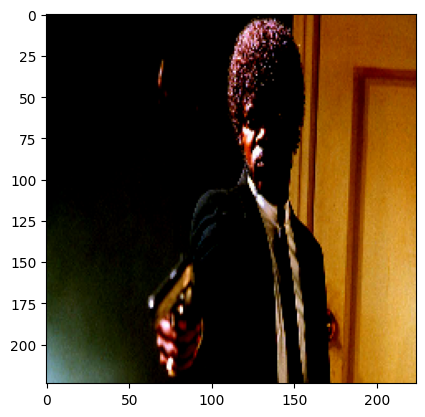

In [41]:
m = 3
plt.imshow(X_test[m])

Showing original mask for test image

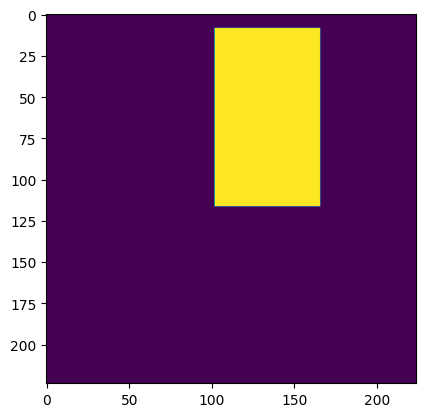

In [48]:
plt.imshow(y_test[m])

Predicting the mask on the test image

In [45]:
pred_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[m]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))

1/1 [==============================] - 2s 2s/step


Imposing the mask on the test image

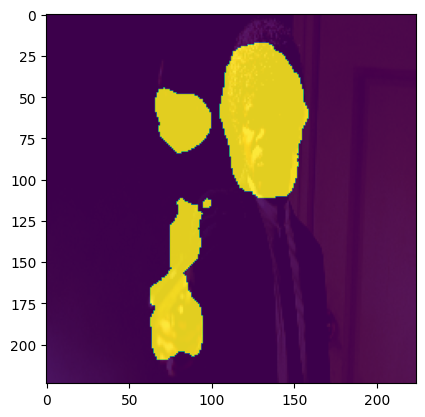

In [46]:
plt.imshow(X_test[m])
plt.imshow(pred_mask, alpha=0.9)

The model is able to detect one faces in the image correctly.

##Part B

• DOMAIN: Entertainment             
• CONTEXT: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.                    
The data labelling is already done. Since there higher time complexity is involved in the                             
• DATA DESCRIPTION: The dataset comprises of face images.                    
• PROJECT OBJECTIVE: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

Importing Libraries

In [1]:
import cv2
import os
import pandas as pd
from zipfile import ZipFile


Unzipiing the ZIP file

In [2]:
zip_file_path = '/content/drive/MyDrive/comouter Visison Project files/training_images-20211126T092819Z-001.zip'
unzip_folder = 'unzipped_training_images'

Extracting the information

In [3]:
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

Unzipped the folder seperately and saved the contents in unzip_folder as it was giving issues while extracting

In [9]:
unzip_folder = '/content/drive/MyDrive/comouter Visison Project files/Training Images'

###Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images

In [10]:
folder_path = unzip_folder
image_files = os.listdir(folder_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

face_data = []

for file_name in image_files:
     # Read image
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read image '{file_name}'. Skipping...")
        continue

Converting image to grayscale

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Detect faces

In [12]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

###From the same loop above, extract metadata of the faces and write into a DataFrame

In [13]:
 for (x,y,w,h) in faces:
        face_data.append({
            'Image': file_name,
            'Face_X': x,
            'Face_Y': y,
            'Face_Width': w,
            'Face_Height': h
        })

###Save the output Dataframe in .csv format

In [14]:
df = pd.DataFrame(face_data)
df.to_csv('faces_metadata.csv', index=False)

print("Metadata saved to 'faces_metadata.csv'")

Metadata saved to 'faces_metadata.csv'


##PART C:

• DOMAIN: Face recognition

• CONTEXT:

Company X intends to build a face identi!ication model to recognise human faces.

• DATA DESCRIPTION:

The dataset comprises of images and its mask where there is a human face.

• PROJECT OBJECTIVE:

Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library. Some data samples:

• TASK:

In this problem, we use a pre-trained model trained on Face recognition to recognise similar faces. Here, we are particularly interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project.

• Load the dataset and create the metadata.

• Check some samples of metadata.

• Load the pre-trained model and weights.

• Generate Embedding vectors for each face in the dataset.

• Build distance metrics for identifying the distance between two given images.

• Use PCA for dimensionality reduction.

• Build an SVM classi!ier in order to map each image to its right person.

• Import the the test image. Display the image. Use the SVM trained model to predict the face.

• Load the dataset and create the metadata.

• Load the dataset and create the metadata.
Change current working directory to project folder

Change current working directory to project folder.

###Part 2.1 a - Unzip, read and Load data(‘PINS.zip’).

In [1]:
path = "/content/drive/MyDrive/comouter Visison Project files/PINS.zip"


Extract the zip file

Extract Aligned Face Dataset from Pinterest.zip

In [2]:

from zipfile import ZipFile

with ZipFile (path,'r') as z:
  z.extractall()
print("Training zip extraction done!")

Training zip extraction done!


### Part 2.1 b - Write function to create metadata of the image

Hint: Metadata means derived information from the available data which can be useful for particular problem statement.

Function to load images
Define a function to load the images from the extracted folder and map each image with person id

In [3]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

Define function to load image
Define a function to load image from the metadata

Defining a function to load image from the metadata

In [4]:

import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them

    return img[...,::-1]

cheking a sample

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
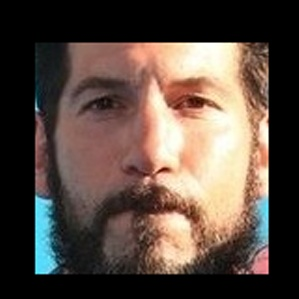

In [5]:
# Loading an image
load_image(metadata[0].image_path())

###Part 2.1 d - Generate Embeddings vectors on the each face in the dataset.

Hint: Use ‘vgg_face_weights.h5’

Load the pre-trained model and weights.


VGG Face model
Here we are giving you the predefined model for VGG face

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

VGGFace Model The VGGFace model, named later, was described by Omkar Parkhi in the 2015 paper titled “Deep Face Recognition.”

A contribution of the paper was a description of how to develop a very large training dataset, required to train modern-convolutional-neural-network-based face recognition systems, to compete with the large datasets used to train models at Facebook and Google.

This dataset is then used as the basis for developing deep CNNs for face recognition tasks such as face identification and verification. Specifically, models are trained on the very large dataset, then evaluated on benchmark face recognition datasets, demonstrating that the model is effective at generating generalized features from faces.

They describe the process of training a face classifier first that uses a softmax activation function in the output layer to classify faces as people. This layer is then removed so that the output of the network is a vector feature representation of the face, called a face embedding. The model is then further trained, via fine-tuning, in order that the Euclidean distance between vectors generated for the same identity are made smaller and the vectors generated for different identities is made larger. This is achieved using a triplet loss function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

Loading the model defined above.          
Then loading the given weight file named "vgg_face_weights.h5"

In [ ]:
model = vgg_face()
pretrained_weights = "/content/drive/MyDrive/comouter Visison Project files/vgg_face_weights.h5"

Let's check first and second last layer of the model to understand the model structure.

In [ ]:
model.layers[0], model.layers[-2]

(<keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x785590f4e380>,
 <keras.layers.reshaping.flatten.Flatten at 0x78558c787790>)

Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [ ]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

### Part 2.1 d - Generate Embeddings vectors on the each face in the dataset.

Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.

In [ ]:

# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 1s 783ms/step
(2622,)


Generate embeddings for all images

Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 543ms/step


Checking shape of Embedding vector

In [ ]:
print("Shape of Embedding Vector: ",embeddings.shape)

Shape of Embedding Vector:  (10770, 2622)


Checking shape of random embeddings

In [ ]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([ 1.21126694e-04, -3.09144874e-04, -2.60713336e-04, ...,
        -2.36082196e-04,  2.07879028e-04, -3.76795579e-05]),
 array([ 6.32911469e-05, -4.39508411e-04, -2.73746351e-04, ...,
        -3.73856339e-04,  1.77443930e-04,  1.19020231e-04]),
 (2622,))

### Part 2.1 e - Build distance metrics for identifying the distance between two similar and dissimilar images.


• Build distance metrics for identifying the distance between two given images.
Function to calculate distance between given 2 pairs of images.
Consider distance metric as "Squared L2 distance"

Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

Plotting images and getting distance between the pairs given below:-  
      
2, 3 and 2, 180          
           

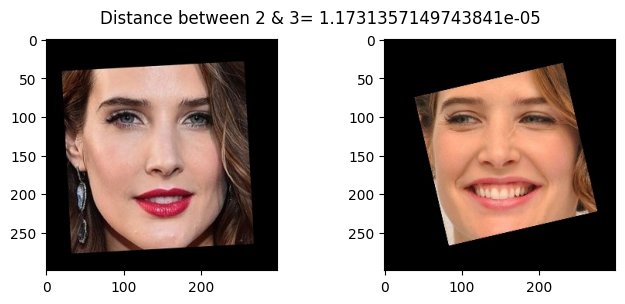

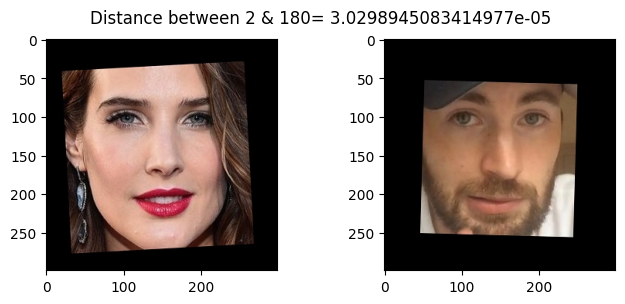

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

show_pair(2, 3)
show_pair(2, 180)

Plotting images and getting distance between the pairs given below:-

30, 31 and 30, 100         
70, 72 and 70, 115

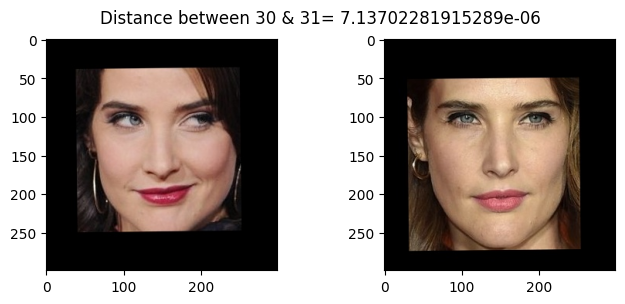

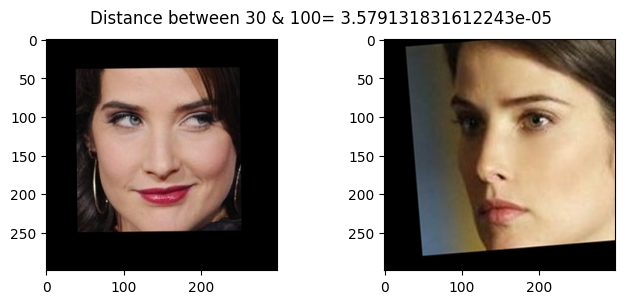

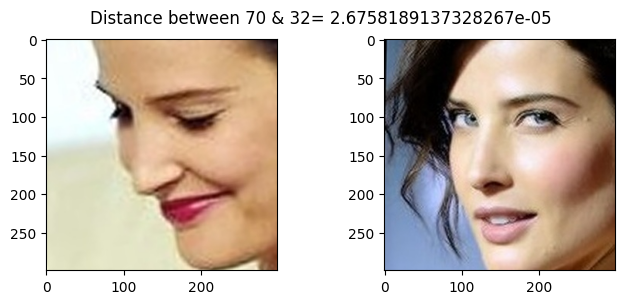

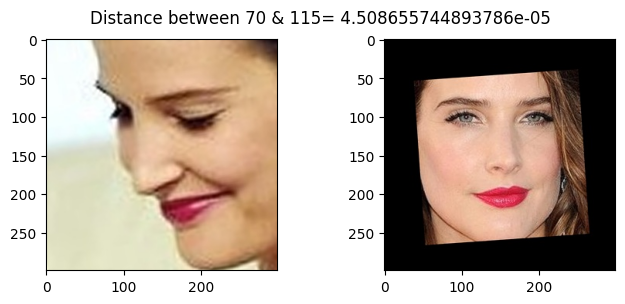

In [ ]:

show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 32)
show_pair(70, 115)

Train and Test Split

In [ ]:

train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]


In [ ]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


Doing a Label encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

Checking the Labels

In [ ]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

checking the array of train encoded and test encoded

In [ ]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [15 15 15 ... 19 19 19]
y_test_encoded :  [15 15 15 ... 19 19 19]


Staandardizing the features

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [ ]:
X_test_std = scaler.transform(X_test)

checking shape of standardized Train and Test dataset

In [ ]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (9573,2622)
y_train_encoded shape : (9573,)
X_test_std shape : (1197,2622)
y_test_encoded shape : (1197,)


### Part 2.1 f - Use PCA for dimensionality reduction.

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


### Part 2.1 g - Build an SVM classifier in order to map each image to its right person.

In [ ]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

Predicting on Test

In [ ]:
y_predict = clf.predict(X_test_pca)

In [ ]:
y_predict_encoded = le.inverse_transform(y_predict)

In [ ]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [15 20 28 ... 13  3 19]
y_test_encoded :  [15 15 15 ... 19 19 19]


In [ ]:
y_test_encoded[32:49]

array([37, 37, 37, 37, 37, 37, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94])

Test results              
Taking random image from test set and plot the image  
Reporting to which person the image belongs to       

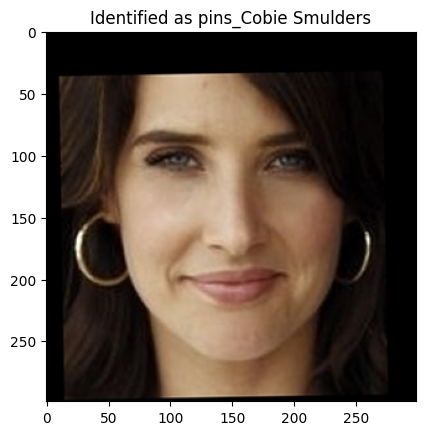

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity = y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

### Part 2.1 h - Import and display the the test images

Importing the test images

In [6]:
Test_image_1=load_image('/content/drive/MyDrive/comouter Visison Project files/Dwayne Johnson4.jpg')
Test_image_2=load_image('/content/drive/MyDrive/comouter Visison Project files/Benedict Cumberbatch9.jpg')


Displaying the test images

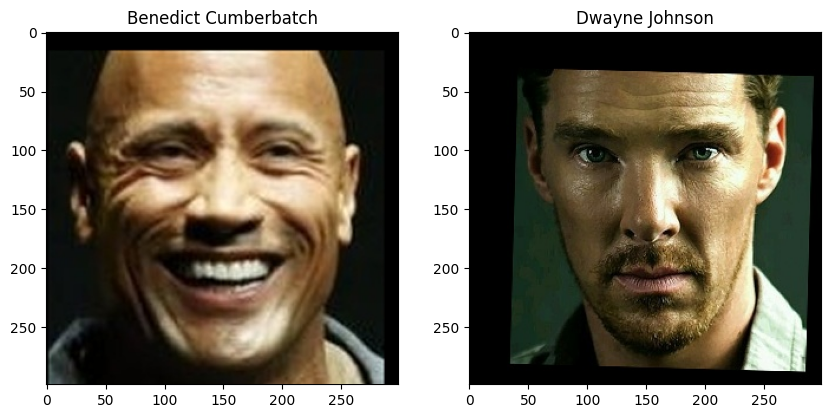

In [13]:
# Display the test images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Test_image_1)
plt.title('Benedict Cumberbatch')
plt.subplot(1, 2, 2)
plt.imshow(Test_image_2)
plt.title('Dwayne Johnson')
plt.show()

### Part 2.1 i - Use the trained SVM model to predict the face on both test images.

In [ ]:
Test_image_1 = (Test_image_1 / 255.).astype(np.float32)
Test_image_1 = cv2.resize(Test_image_1, dsize = (224,224))
Test_image_2 = (Test_image_2 / 255.).astype(np.float32)
Test_image_2 = cv2.resize(Test_image_2, dsize = (224,224))
print(Test_image_1.shape)
print(Test_image_2.shape)

(224, 224, 3)
(224, 224, 3)


In [ ]:
embeddings1 = np.zeros((1, 2622))
embeddings2 = np.zeros((1, 2622))

In [ ]:
embedding_vector1 = vgg_face_descriptor.predict(np.expand_dims(Test_image_1, axis=0))[0]
embeddings1[0]= embedding_vector1
embedding_vector2 = vgg_face_descriptor.predict(np.expand_dims(Test_image_2, axis=0))[0]
embeddings2[0]= embedding_vector2
print(embedding_vector1.shape)
print(embedding_vector2.shape)

1/1 [==============================] - 1s 552ms/step
(2622,)
(2622,)


In [ ]:
first_image = embeddings1
second_image = embeddings2

In [ ]:
X_test_1 = scaler.transform(first_image)
X_test_2 = scaler.transform(second_image)

In [ ]:
X_test_pca_1 = pca.transform(X_test_1)
X_test_pca_2 = pca.transform(X_test_2)


In [ ]:
X_test_pca_1.shape
X_test_pca_2.shape

(1, 128)

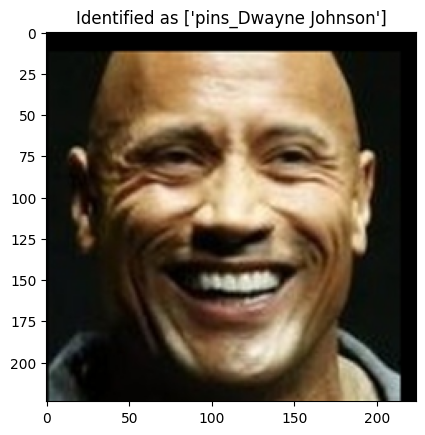

In [ ]:

y_predict_1 = clf.predict(X_test_pca_1)
y_predict_encoded_1 = le.inverse_transform(y_predict_1)

plt.imshow(Test_image_1)
plt.title(f'Identified as {y_predict_encoded_1}');

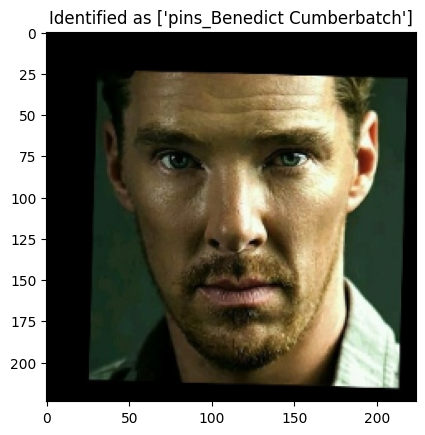

In [ ]:
y_predict_2 = clf.predict(X_test_pca_2)
y_predict_encoded_2 = le.inverse_transform(y_predict_2)

plt.imshow(Test_image_2)
plt.title(f'Identified as {y_predict_encoded_2}');

The SVM model is able to detect the test images